# EDA

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 

In [2]:
DATA_FOLDER = './data/'

train = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
test = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))
items = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [3]:
print('Train shape: ', train.shape)
print('Test shape: ', test.shape)
print('Items shape: ', items.shape)
print('Categories shape: ', categories.shape)
print('Shops shape: ', shops.shape)

Train shape:  (2935849, 6)
Test shape:  (214200, 3)
Items shape:  (22170, 3)
Categories shape:  (84, 2)
Shops shape:  (60, 2)


In [4]:
train.date = pd.to_datetime(train.date, format='%d.%m.%Y')
train = train.assign(revenue=train.item_price * train.item_cnt_day)

In [5]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
items.nunique()

item_name           22170
item_id             22170
item_category_id       84
dtype: int64

In [7]:
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
categories.nunique()

item_category_name    84
item_category_id      84
dtype: int64

In [9]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [10]:
shops.nunique()

shop_name    60
shop_id      60
dtype: int64

In [11]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [12]:
train.nunique()

date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        198
revenue           24775
dtype: int64

In [13]:
train.isnull().describe()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
count,2935849,2935849,2935849,2935849,2935849,2935849,2935849
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,2935849,2935849,2935849,2935849,2935849,2935849,2935849


In [14]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,1.157732e+03
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,5.683604e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,-6.897000e+04
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.490000e+02
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.490000e+02
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,1.078200e+03
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,1.829990e+06


In [15]:
print(train.date.min(), train.date.max())
tdvc = train.date.value_counts().sort_index()
tdvc.head()

2013-01-01 00:00:00 2015-10-31 00:00:00


2013-01-01    1669
2013-01-02    6718
2013-01-03    6298
2013-01-04    5634
2013-01-05    5545
Name: date, dtype: int64

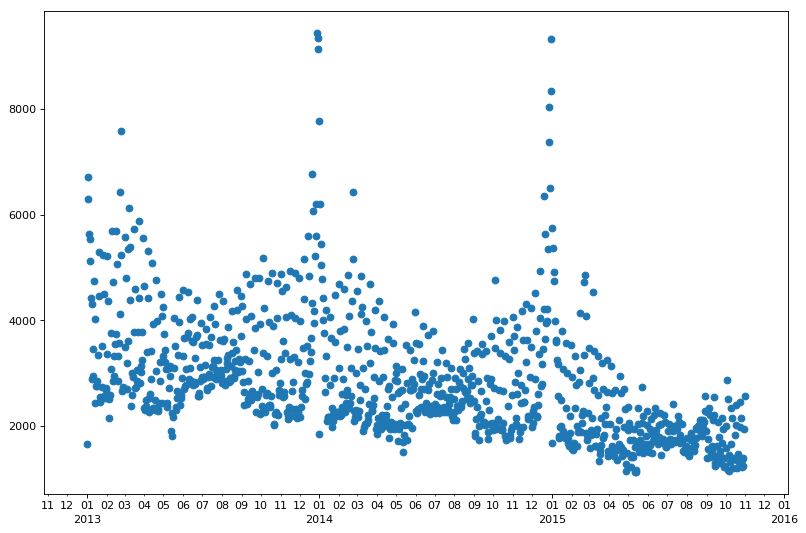

In [16]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
ax.scatter(tdvc.index, tdvc)
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_tick_params(which='major', pad=15)

In [17]:
train[['date', 'date_block_num']].drop_duplicates().groupby('date_block_num').count()

,date
date_block_num,
0,31
1,28
2,31
3,30
4,31
5,30
6,31
7,31
8,30


In [18]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


"Submissions are evaluated by root mean squared error (RMSE). True target values are clipped into [0,20] range."

and

"For each id in the test set, you must predict a total number of sales."

and

"Submission is for date_block_num 34"

and

"
My CV strategy is 5-fold moving window:

fold 1: Train on month 0 to 32 and validate on 33
fold 2: Train on month 0 to 31 and validate on 32
…
fold 5: Train on month 0 to 28 and validate on 29
"

and

- mean encodings
- lag
- text extraction on item and category names

In [19]:
grouped = train.merge(items).merge(categories).groupby(['date_block_num', 'shop_id', 'item_category_id']).sum()
grouped = grouped.reset_index()
grouped = grouped[['date_block_num', 'shop_id', 'item_category_id', 'item_cnt_day']]

In [20]:
grouped.head()

,date_block_num,shop_id,item_category_id,item_cnt_day
0,0,0,2,53.0
1,0,0,3,28.0
2,0,0,4,16.0
3,0,0,5,28.0
4,0,0,6,65.0


In [21]:
grouped.nunique()

date_block_num        34
shop_id               60
item_category_id      84
item_cnt_day        1048
dtype: int64

In [22]:
grouped.describe()

,date_block_num,shop_id,item_category_id,item_cnt_day
count,65189.000000,65189.000000,65189.000000,65189.000000
mean,16.528433,31.167237,41.190646,55.963521
std,9.623709,17.103569,23.803409,139.878459
min,0.000000,0.000000,0.000000,-22.000000
25%,8.000000,17.000000,21.000000,5.000000
50%,17.000000,30.000000,38.000000,14.000000
75%,25.000000,46.000000,64.000000,48.000000
max,33.000000,59.000000,83.000000,5129.000000


In [28]:
categories_by_time = grouped.groupby(['date_block_num', 'item_category_id']).sum()
categories_by_time = categories_by_time.reset_index()
categories_by_time = categories_by_time[['date_block_num', 'item_category_id', 'item_cnt_day']]

In [32]:
categories_by_time = categories_by_time.assign(size = (categories_by_time.item_cnt_day * 200) / categories_by_time.item_cnt_day.max())

In [33]:
categories_by_time.head()

,date_block_num,item_category_id,item_cnt_day,size
0,0,0,1.0,0.005513
1,0,1,1.0,0.005513
2,0,2,1390.0,7.663258
3,0,3,440.0,2.425779
4,0,4,251.0,1.383797


/home/mortennp/anaconda3/envs/AdvML3_6/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


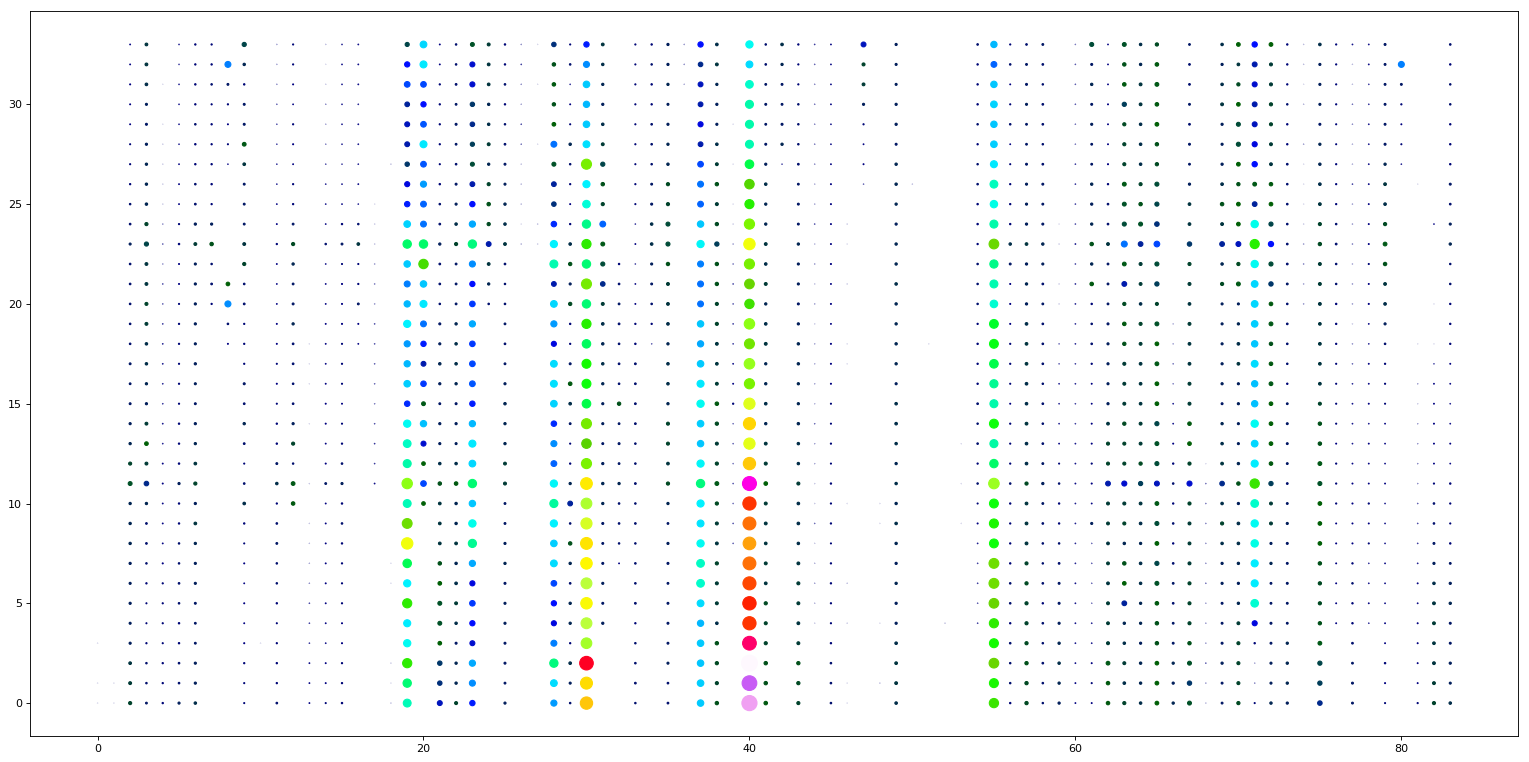

In [36]:
fig, ax = plt.subplots(figsize=(24,12), dpi=80, facecolor='w', edgecolor='k')
ax.scatter('item_category_id', 'date_block_num', c='item_cnt_day', s='size',
           cmap=mpl.cm.gist_ncar, 
           norm=mpl.colors.Normalize(vmin=categories_by_time.item_cnt_day.min(), vmax=categories_by_time.item_cnt_day.max()),
           data=categories_by_time)

In [40]:
categories_by_time.groupby(['item_category_id']).agg({'item_cnt_day' : ['mean', 'std']})

item_cnt_day             
                          mean          std
item_category_id                           
0                     1.000000     0.000000
1                     1.000000     0.000000
2                   576.382353   446.919016
3                   876.676471   626.172051
4                    77.645161    76.370391
5                   218.029412   147.618568
6                   602.117647   268.010037
7                   382.714286   390.404805
8                  1245.363636  2021.805840
9                   532.882353   549.131202
10                    1.000000          NaN
11                  188.323529   177.819064
12                  551.250000   541.448882
13                   23.800000    31.291715
14                   90.058824    84.100568
15                  175.882353   125.441225
16                  176.687500   247.309177
17                   19.666667    17.136705
18                    1.833333     0.983192
19                 7496.676471  3878.321534
20                 5304.958333  2459.297664
21                  972.529412   897.705231
22                  738.911765   325.683465
23                 4998.352941  2036.379004
24                 1206.142857   695.476135
25                  574.647059   249.937796
26                   10.363636    10.042636
27                    1.600000     0.894427
28                 5145.705882  2264.948572
29                  661.647059   661.764486
...                        ...          ...
54                  230.200000   103.495594
55                10252.676471  2818.473859
56                  243.558824   137.608622
57                  961.264706   367.611316
58                  400.911765   116.554934
59                  287.434783   292.164933
60                   44.029412    20.055205
61                  447.352941   536.088973
62                  851.264706   687.232364
63                 1789.882353   897.743696
64                 1157.558824   530.809342
65                 2149.323529   606.585362
66                  295.500000   240.354891
67                 1303.029412   740.924708
68                    9.923077     5.171420
69                  938.088235   626.080127
70                 1325.500000   656.238605
71                 5529.352941  3090.929554
72                 1518.264706   784.932435
73                  428.617647   143.406609
74                    4.538462     3.665501
75                 1418.352941   613.470993
76                  188.233333    72.941017
77                  114.705882   152.061895
78                   85.033333    38.660756
79                  465.588235   508.583721
80                 1022.666667  2027.104108
81                   50.789474    53.650700
82                  497.000000   487.631008
83                  353.882353   221.398963

[84 rows x 2 columns]

In [23]:
grouped = grouped.assign(size = (grouped.item_cnt_day * 200) / grouped.item_cnt_day.max())

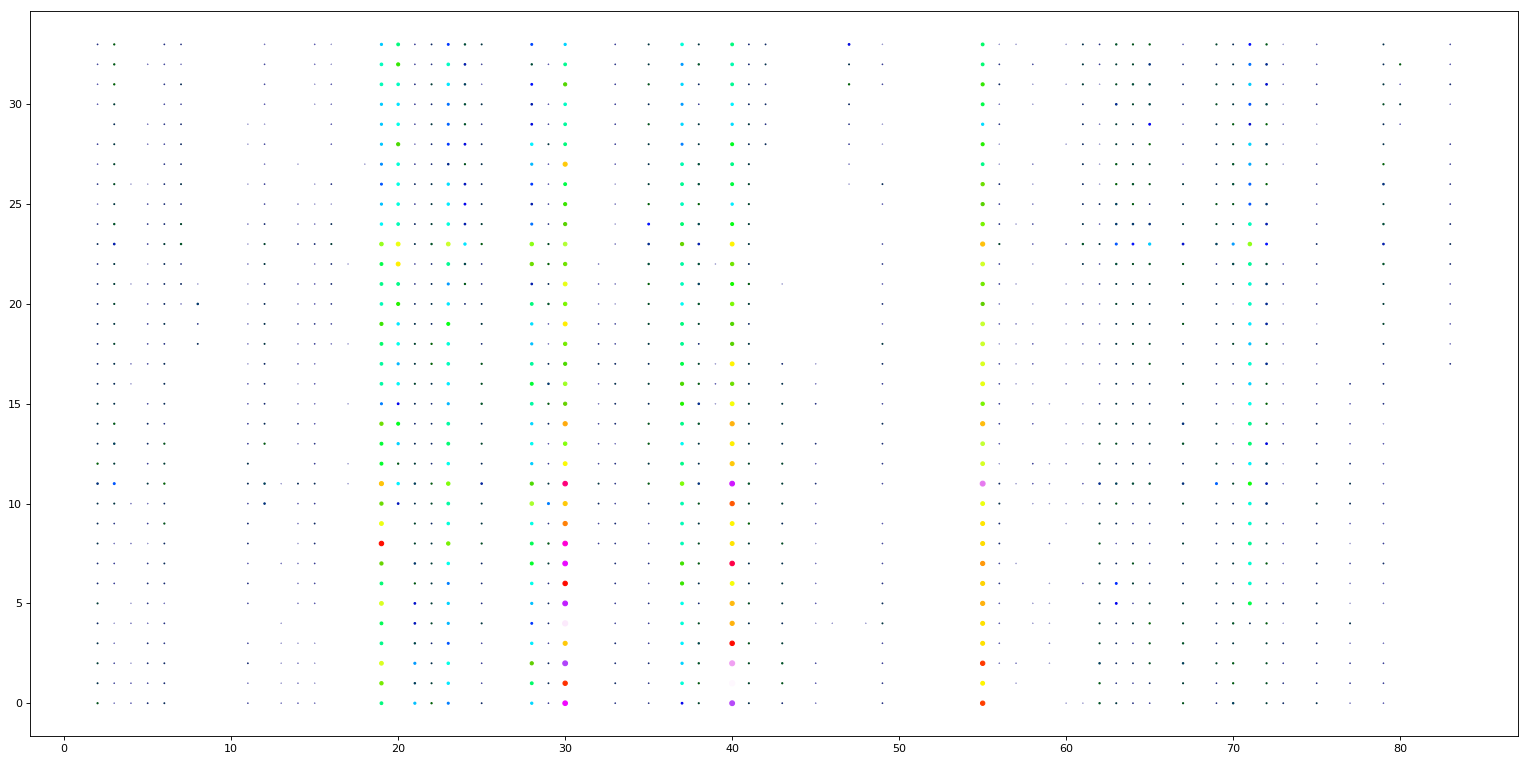

In [24]:
shop_0 = grouped.query('shop_id == 35').reset_index()

norm = mpl.colors.Normalize(vmin=shop_0.item_cnt_day.min(), vmax=shop_0.item_cnt_day.max())
fig, ax = plt.subplots(figsize=(24,12), dpi=80, facecolor='w', edgecolor='k')
ax.scatter('item_category_id', 'date_block_num', c='item_cnt_day', s='size', 
           cmap=mpl.cm.gist_ncar, norm=norm, data=shop_0)

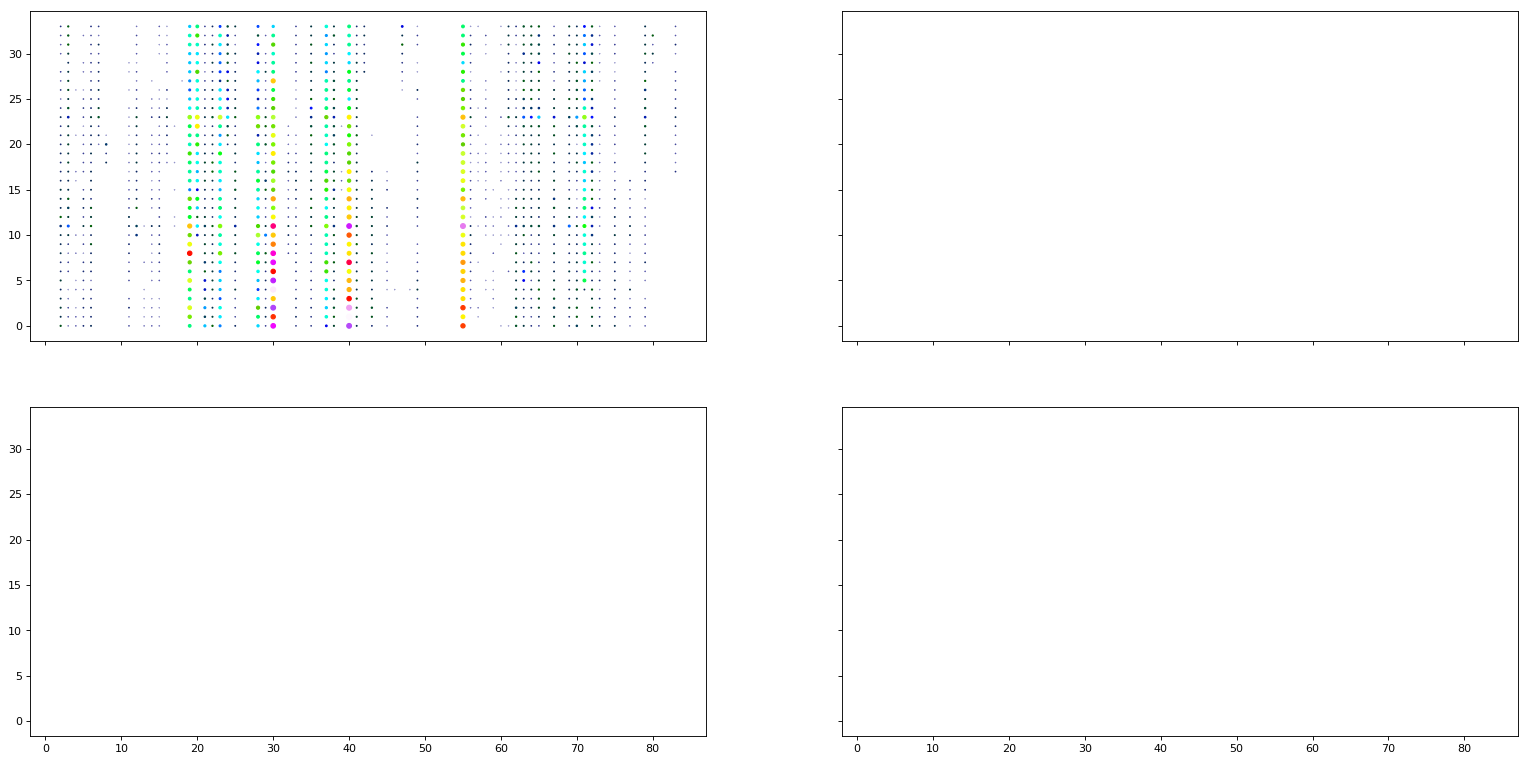

In [25]:
#Note that this is the same as
fix, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(24,12), dpi=80, facecolor='w', edgecolor='k')
axes[0,0].scatter('item_category_id', 'date_block_num', c='item_cnt_day', s='size', 
           cmap=mpl.cm.gist_ncar, norm=norm, data=grouped.query('shop_id == 35').reset_index())

In [26]:
grouped.query('shop_id == 35').reset_index()

,index,date_block_num,shop_id,item_category_id,item_cnt_day,size
0,1155,0,35,2,25.0,0.974849
1,1156,0,35,3,2.0,0.077988
2,1157,0,35,4,3.0,0.116982
3,1158,0,35,5,9.0,0.350946
4,1159,0,35,6,13.0,0.506921
5,1160,0,35,11,4.0,0.155976
6,1161,0,35,13,2.0,0.077988
7,1162,0,35,14,3.0,0.116982
8,1163,0,35,15,2.0,0.077988
9,1164,0,35,19,152.0,5.927081


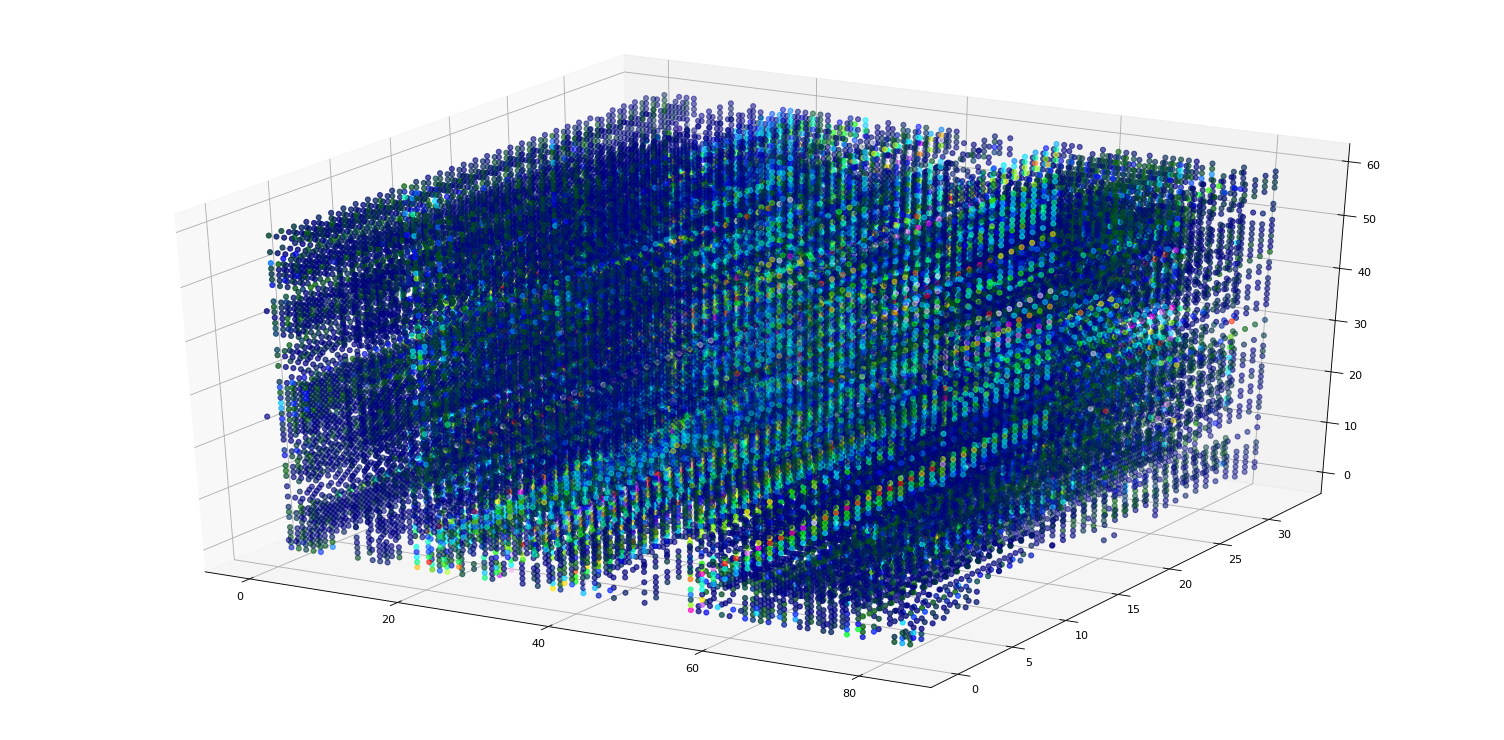

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(24,12), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(grouped.item_category_id, grouped.date_block_num, grouped.shop_id,
          c=grouped.item_cnt_day, cmap=mpl.cm.gist_ncar, norm=norm)